# Pymaceuticals Inc.
---

### Analysis

- The study has a very strong showing for variability in it's testing. Testing is split very equally between male and female mice subjects, and their weights show a broad range between 15-30 grams, ensuring results and data on a wide range of subject physicalities. Even discounting the removal of Subject g989 from the data pool, all drug regimens tested were also fairly evenly distributed among subjects.
- The data overall showed a high positive correlation between mouse subject weights and tumor volume. This trend seems to indicate that heavier weights - and lifestyles relating to them - may accelerate the rate of tumor growth for this and potentially other types of cancer as well.
- Overall, the focus of Pymaceuticals, Inc. on the Capomulin drug regimen seems to be well-founded. The results of the tests show a clear advantage against many other drug regimens tested, as mice tested with Capomulin show significantly smaller tumors and greater reductions in tumor size on average, only being beaten out by Ramicane out of all drug regimens tested.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouseTests = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouseTests.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [72]:
# Checking the number of mice.
len(mouseTests["Mouse ID"].unique())

249

In [73]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouseTests[mouseTests.duplicated(['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [74]:
# Optional: Get all the data for the duplicate mouse ID.
dupeMouse = mouseTests.loc[mouseTests["Mouse ID"] == "g989"]
dupeMouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMouseTests = mouseTests.loc[mouseTests["Mouse ID"] != "g989"]
cleanMouseTests = cleanMouseTests.sort_values(by=["Mouse ID", "Timepoint"]).reset_index(drop=True)
cleanMouseTests.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [76]:
# Checking the number of mice in the clean DataFrame.
len(cleanMouseTests["Mouse ID"].unique())

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drugGroups = cleanMouseTests.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
summary = drugGroups.describe()[["mean", "std"]]
summary["Median"] = drugGroups.median()
summary["Variance"] = drugGroups.var()
summary["SEM"] = drugGroups.sem()

# Assemble the resulting series into a single summary DataFrame.
summary = summary.rename(columns={"mean": "Mean", "std": "STD"})[["Mean", "Median", "Variance", "STD", "SEM"]]
summary

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Tests by Drug Regimen Utilized'}, xlabel='Drug Regimen'>

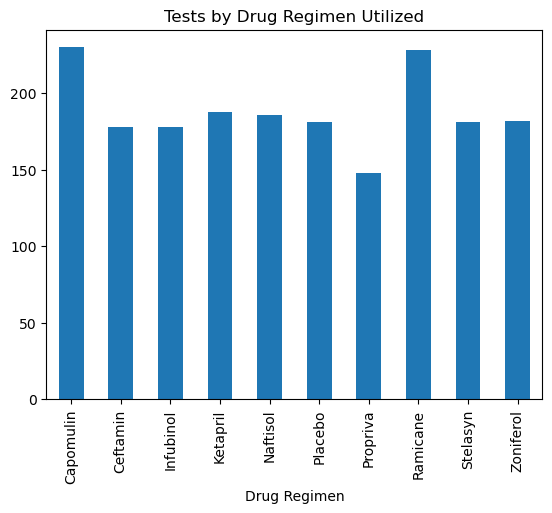

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleanMouseTests.groupby(["Drug Regimen"])["Mouse ID"].count().plot(kind="bar", x="Mouse ID", title="Tests by Drug Regimen Utilized")

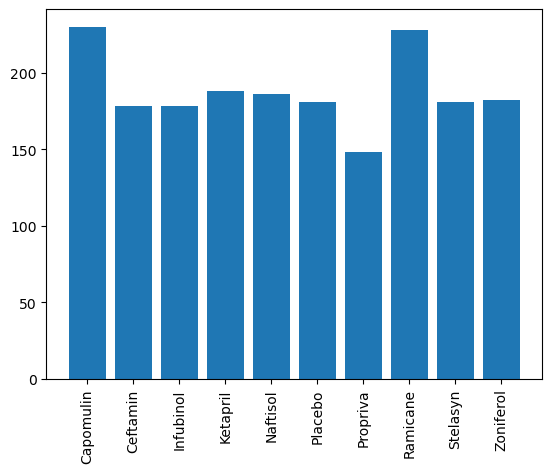

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
totals = cleanMouseTests.groupby(["Drug Regimen"])["Mouse ID"].count()
regiments = list(totals.keys())
counts = list(totals)

plt.bar(regiments, counts)
plt.xticks(rotation="vertical")
plt.show()

<Axes: ylabel='count'>

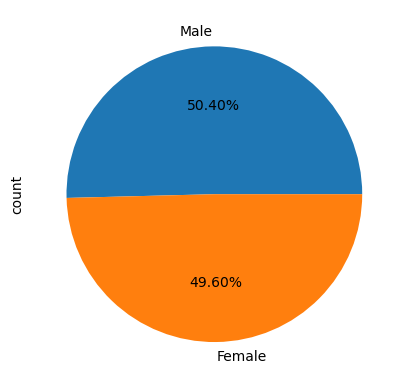

In [80]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
miceGenders = cleanMouseTests.drop_duplicates(['Mouse ID'])[["Mouse ID", "Sex"]]
GenderDist = miceGenders["Sex"].value_counts()

# Make the pie chart
GenderDist.plot(kind="pie", x=["Sex"], autopct="%.2f%%")

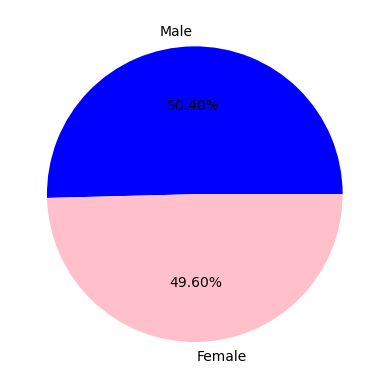

In [81]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sexValues = list(GenderDist)
sexes = ["Male", "Female"]

# Make the pie chart
plt.pie(sexValues, labels=sexes, colors=["blue", "pink"], autopct="%.2f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalMice = cleanMouseTests.drop_duplicates(['Mouse ID'], keep='last').reset_index(drop=True)
finalMice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatmentList:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatmentFocus = finalMice.loc[finalMice["Drug Regimen"] == drug]

    # add subset
    volumes = treatmentFocus["Tumor Volume (mm3)"]
    tumorVol.append(list(volumes))

    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of volumes for the {drug} tests is: {lowerq}")
    print(f"The upper quartile of volumes for the {drug} tests is: {upperq}")
    print(f"The interquartile range of volumes for the {drug} tests is: {iqr}")
    print(f"The the median of volumes for the {drug} tests is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("---------------- \n")
    


The lower quartile of volumes for the Capomulin tests is: 32.37735684
The upper quartile of volumes for the Capomulin tests is: 40.1592203
The interquartile range of volumes for the Capomulin tests is: 7.781863460000004
The the median of volumes for the Capomulin tests is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------- 

The lower quartile of volumes for the Ramicane tests is: 31.56046955
The upper quartile of volumes for the Ramicane tests is: 40.65900627
The interquartile range of volumes for the Ramicane tests is: 9.098536719999998
The the median of volumes for the Ramicane tests is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------- 

The lower quartile of volumes for the Infubinol tests is: 54.04860769
The upper quartile of volumes for the Infubinol tests is: 65.52574285
The interquartile range of volumes for the Infubinol tests is: 

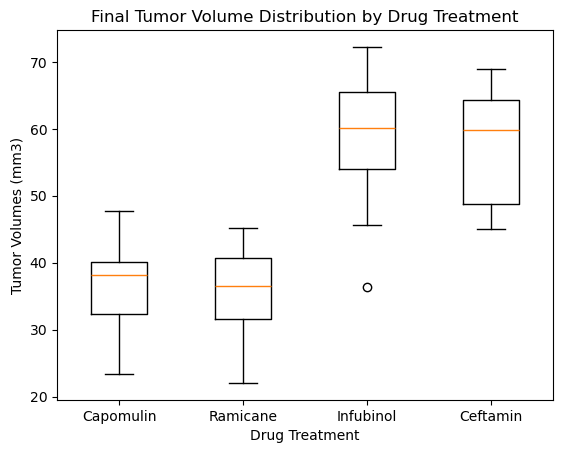

In [84]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumorVol, labels=treatmentList)
plt.title("Final Tumor Volume Distribution by Drug Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Tumor Volumes (mm3)")
plt.show()

## Line and Scatter Plots

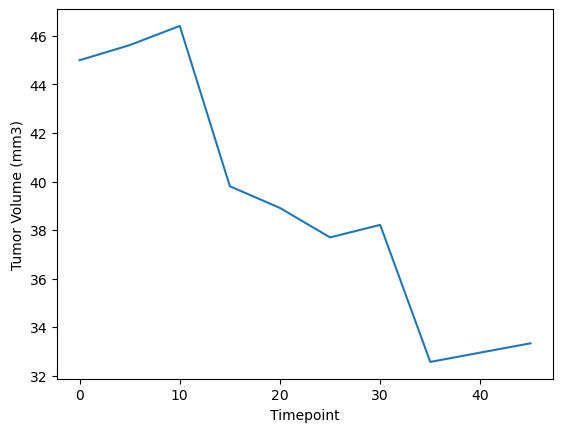

In [85]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
'''
Run array call below to find subjects
cleanMouseTests.loc[cleanMouseTests["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
Subject ID Chosen: m957
'''
capoSubject = cleanMouseTests.loc[cleanMouseTests["Mouse ID"] == "m957"]
plt.plot(capoSubject["Timepoint"], capoSubject["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

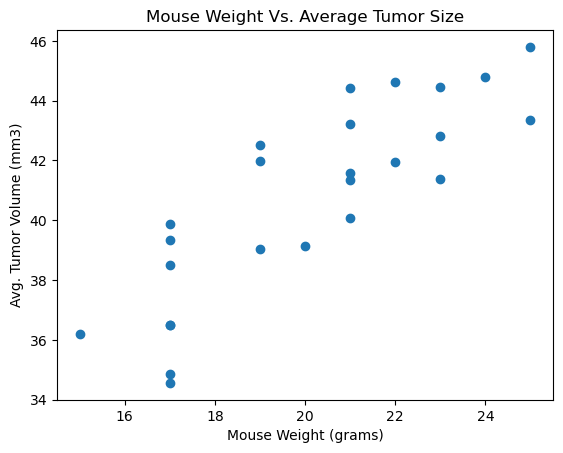

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinFull = cleanMouseTests.loc[cleanMouseTests["Drug Regimen"] == "Capomulin"][["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
weightToTumors = capomulinFull.groupby(['Mouse ID']).mean()
weight = weightToTumors["Weight (g)"]
tumors = weightToTumors["Tumor Volume (mm3)"]
plt.scatter(weight, tumors)
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Average Tumor Size")
plt.show()

## Correlation and Regression

In [87]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between a mouse's weight and their tumor volume is {round(st.pearsonr(weight, tumors)[0], 2) }")

The correlation coefficient between a mouse's weight and their tumor volume is 0.84


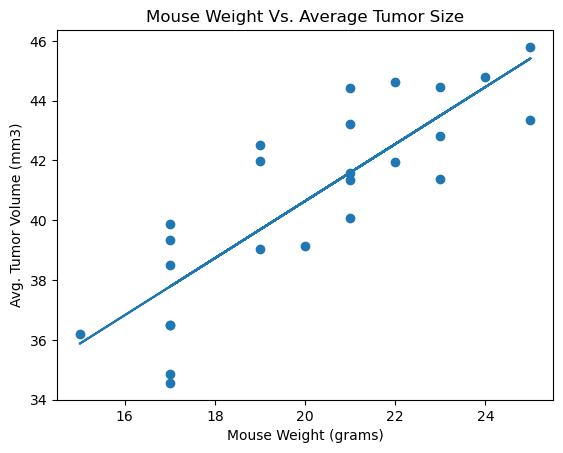

In [88]:
# linear regression model calculation and display
slope, intercept, r, p, std_err = st.linregress(weight, tumors)

def lineRegress(x):
    return slope * x + intercept

linearModel = list(map(lineRegress, weight))

plt.scatter(weight, tumors)
plt.plot(weight, linearModel)
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Average Tumor Size")
plt.show()